# How are in-demand skills trending for Data Analysts?

#### Methology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

## Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# US based data filtering

## Group the Skills by Month in US

In [ ]:
## Skill count per month for data analysts
df_DA_US = df[(df['job_title']=='Data Analyst')&(df['job_country']=='United States')].copy()
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

# Explode job_skills column
df_DA_US_explode = df_DA_US.explode('job_skills')

### Pivot in Prep for Plotting


In [3]:
# Group by month and job_skills
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,12,0,53,0,1,0,0,1,1,8,...,2,0,0,2,10,0,169,0,0,3
2,13,0,34,1,2,0,0,4,2,7,...,0,5,1,1,21,1,128,0,0,2
3,11,0,41,1,3,0,0,6,2,4,...,1,2,0,2,14,3,142,0,0,4
4,5,0,57,1,0,0,0,1,0,1,...,2,0,0,1,24,4,143,1,0,2
5,6,1,35,0,3,0,0,1,2,1,...,0,0,0,1,20,0,92,0,0,1
6,10,3,33,1,1,0,2,0,0,4,...,1,0,0,0,15,2,126,0,0,2
7,13,0,33,0,1,0,0,1,0,4,...,0,0,0,0,15,2,101,0,1,0
8,9,2,29,0,0,0,0,0,0,14,...,0,0,0,1,15,1,112,0,0,5
9,7,0,19,1,0,1,0,2,0,0,...,2,0,0,0,11,0,65,0,0,2


#### Sort columns by count and change month numbers to names

In [7]:
# sorts by count
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_US_pivot = df_DA_US_pivot.drop('Total')
df_DA_US_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,colocation,yarn,hugging face,nuix,apl,nltk,mariadb,graphql,opencv,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,1,0,0,0,0,1,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,0,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,0,0,0,0,0,0,1,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,0,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,1,0,0,0,0,0,0,0,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,1,1,0,0,0,0,0


## Plot the Monthly Skill Counts in US

Plot a line chart of the top 5 skills for data analysts, indexed by month. It selects the first five columns and plots them. 

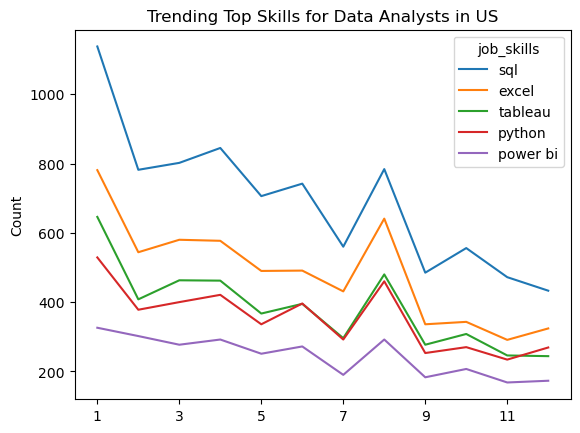

In [9]:
df_DA_US_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in US')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

This is good but totals can be misleading without context. Percentages clarify relationships within the whole, giving a more accurate comparison.

## Calculate Percentage of Total Jobs in US

In [11]:
DA_totals = df_DA_US.groupby('job_posted_month_no').size()
DA_totals

job_posted_month_no
1     1816
2     1284
3     1362
4     1369
5     1156
6     1207
7      955
8     1414
9      856
10    1002
11     848
12     817
dtype: int64

In [12]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_US_percent = df_DA_US_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_no')

df_DA_US_percent

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,colocation,yarn,hugging face,nuix,apl,nltk,mariadb,graphql,opencv,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,...,0.055066,0.000000,0.000000,0.000000,0.000000,0.055066,0.000000,0.000000,0.000000,0.000000
Feb,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086505,0.000000,0.000000,0.000000
Jun,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,8.202154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,6.492147,...,0.000000,0.104712,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.104712
Aug,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,6.930693,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,7.827103,...,0.000000,0.000000,0.000000,0.116822,0.116822,0.000000,0.000000,0.000000,0.000000,0.000000


## Plot Monthly Skill Demand in US

Creates a line plot for the top five skills of data analysts.

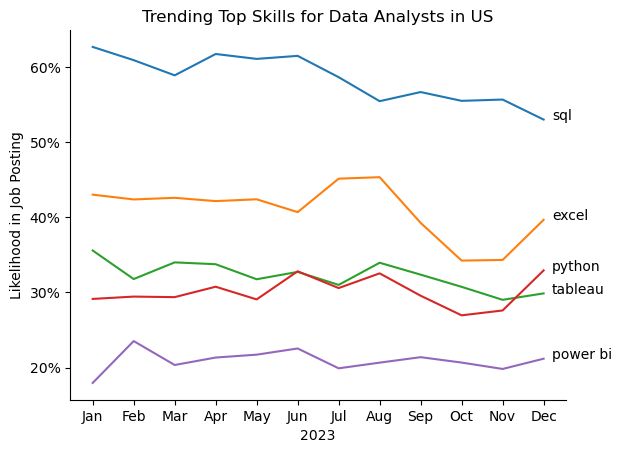

In [31]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_US_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False)
sns.despine()

plt.title('Trending Top Skills for Data Analysts in US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()

# India based data filtering

## Group the Skills by Month in India

In [17]:
df_DA_Ind = df[(df['job_country']=='India')&(df['job_title']=='Data Analyst')].copy()
df_DA_Ind['job_posted_month_no_Ind'] = df_DA_Ind['job_posted_date'].dt.month
df_DA_Ind_explode = df_DA_Ind.explode('job_skills')

### Pivot in Prep for Plotting

In [18]:
#Group by month and job_skills
df_DA_Ind_pivot = df_DA_Ind_explode.pivot_table(index='job_posted_month_no_Ind', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_Ind_pivot

job_skills,airflow,alteryx,ansible,arch,asana,asp.net,assembly,aurora,aws,azure,...,vba,visio,visual basic,vmware,watson,webex,windows,wire,word,zoom
job_posted_month_no_Ind,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,1,0,0,6,5,...,6,1,0,0,0,1,1,0,8,0
2,1,8,0,0,0,0,0,0,6,7,...,8,0,0,0,1,0,1,0,3,0
3,1,1,1,0,0,0,0,0,7,6,...,4,0,0,0,0,0,2,0,3,0
4,0,1,0,1,0,0,1,0,4,8,...,2,2,0,0,0,0,1,0,6,0
5,0,4,0,0,0,0,0,0,4,9,...,4,0,1,0,0,0,2,0,4,0
6,1,5,0,0,0,0,0,1,10,9,...,1,0,1,1,0,0,0,0,1,0
7,3,2,0,0,0,0,0,0,5,8,...,5,0,1,0,0,0,0,0,1,0
8,7,5,0,0,0,0,0,0,20,11,...,4,0,0,0,0,0,0,0,7,0
9,1,2,0,0,1,0,0,0,12,5,...,4,2,0,2,0,0,1,0,1,0


#### Sort columns by count and change month numbers to names

In [24]:
# sorts by count
df_DA_Ind_pivot.loc['Total'] = df_DA_Ind_pivot.sum()
df_DA_Ind_pivot = df_DA_Ind_pivot[df_DA_Ind_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_Ind_pivot=df_DA_Ind_pivot.drop('Total')

## Plot the Monthly Skill Counts in India

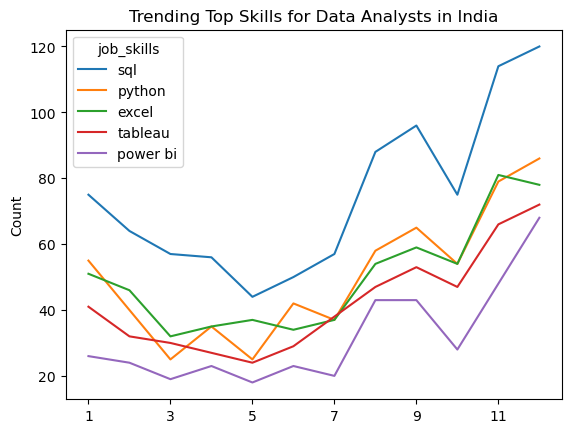

In [25]:
df_DA_Ind_pivot.iloc[:,:5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in India')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

## Calculate Percentage of Total Jobs in India

In [26]:
DA_totals_Ind = df_DA_Ind.groupby('job_posted_month_no_Ind').size()

DA_totals_Ind

job_posted_month_no_Ind
1     144
2     118
3      97
4      99
5      64
6      93
7      92
8     141
9     166
10    126
11    204
12    195
dtype: int64

In [29]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_Ind_percent = df_DA_Ind_pivot.iloc[:12].div(DA_totals_Ind/100, axis=0)

# changes month number to month name
df_DA_Ind_percent = df_DA_Ind_percent.reset_index()
df_DA_Ind_percent['job_posted_month'] = df_DA_Ind_percent['job_posted_month_no_Ind'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_Ind_percent = df_DA_Ind_percent.set_index('job_posted_month')
df_DA_Ind_percent = df_DA_Ind_percent.drop(columns='job_posted_month_no_Ind')

df_DA_Ind_percent

job_skills,sql,python,excel,tableau,power bi,sas,r,aws,azure,javascript,...,bitbucket,arch,wire,asana,aurora,unify,asp.net,watson,webex,no-sql
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,52.083333,38.194444,35.416667,28.472222,18.055556,25.000000,15.972222,4.166667,3.472222,7.638889,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.694444,0.000000,0.694444,0.000000
Feb,54.237288,33.898305,38.983051,27.118644,20.338983,11.864407,19.491525,5.084746,5.932203,6.779661,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.847458,0.000000,0.000000
Mar,58.762887,25.773196,32.989691,30.927835,19.587629,10.309278,9.278351,7.216495,6.185567,3.092784,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,1.030928
Apr,56.565657,35.353535,35.353535,27.272727,23.232323,24.242424,16.161616,4.040404,8.080808,7.070707,...,1.010101,1.010101,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
May,68.750000,39.062500,57.812500,37.500000,28.125000,15.625000,14.062500,6.250000,14.062500,4.687500,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Jun,53.763441,45.161290,36.559140,31.182796,24.731183,30.107527,24.731183,10.752688,9.677419,5.376344,...,0.000000,0.000000,0.000000,0.00000,1.075269,0.00000,0.000000,0.000000,0.000000,0.000000
Jul,61.956522,40.217391,40.217391,41.304348,21.739130,21.739130,25.000000,5.434783,8.695652,5.434783,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Aug,62.411348,41.134752,38.297872,33.333333,30.496454,17.021277,19.858156,14.184397,7.801418,4.964539,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Sep,57.831325,39.156627,35.542169,31.927711,25.903614,15.662651,16.265060,7.228916,3.012048,8.433735,...,0.000000,0.000000,0.000000,0.60241,0.000000,0.60241,0.000000,0.000000,0.000000,0.000000


## Plot Monthly Skill Demand in India

Creates a line plot for the top five skills of data analysts, shown as percentages of the total job entries per month.

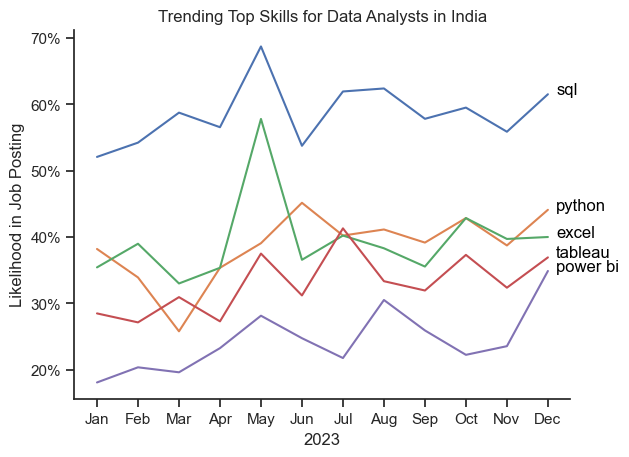

In [33]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_Ind_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False)
sns.despine() 

plt.title('Trending Top Skills for Data Analysts in India')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()